# Le kNN ou les k plus proches voisins


## Rappel 

Attribuer une "étiquette" a une nouvelle données en fonction de son voisinage le plus proche. 

Le voisinage est déterminé via l'hyperparamètre k grâce à une validation croisée. 


## Présentation du problème

Nous allons travailler avec un jeu de données qui contient des informations physico-chimiques de vins portugais, ainsi que leur qualité telle que notée par des humains.

Le problème, sur ces données, est de prédire automatiquement la qualité sur la base de ces informations, afin d’assister le travail d’évaluation des œnologues, d’améliorer la production de vin, et de cibler le goût des consommateurs sur des marchés de niche.

## Importation des librairies et visualisation des données

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

data = pd.read_csv('../data/winequality-white.csv', sep=";")
print(data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

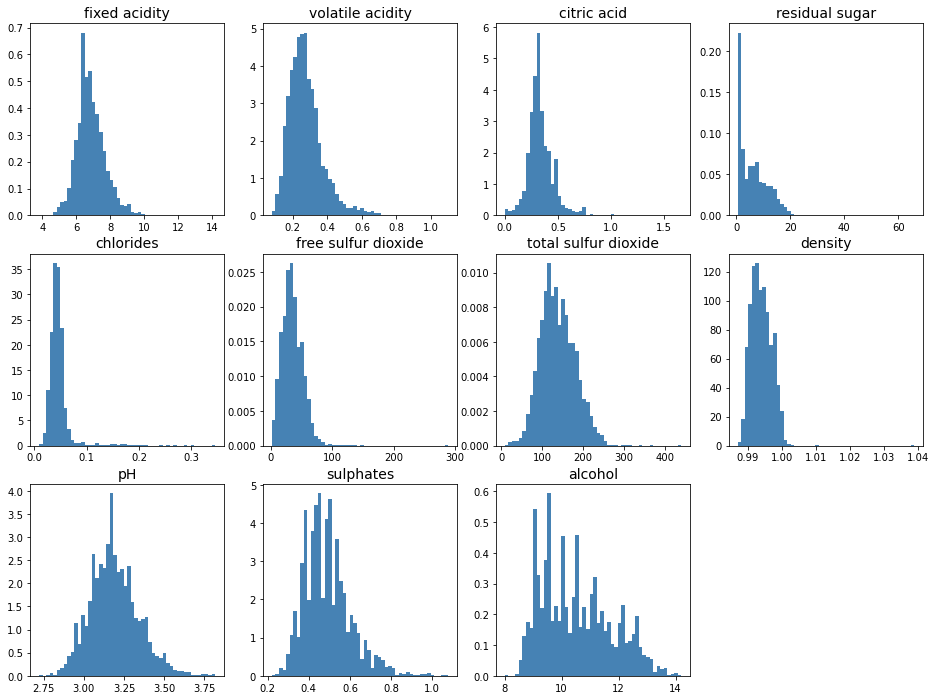

In [27]:
# Récupération des données et stockage dans une variable 

X = data[data.columns[:-1]].values
y = data['quality'].values

# Affichage des données 
fig = plt.figure(figsize=(16,12))

for i in range(X.shape[1]):
    ax = fig.add_subplot(3,4, (i+1))
    h = ax.hist(x[:, i], bins=50, color="steelblue", density='True', edgecolor='none')
    ax.set_title(data.columns[i], fontsize=14)

**Rien ne vous choque??**

## Standardisation des données 

In [20]:
# Je sépare les vins médiocres des bons vins => le but est de transformer le 
# problème en un problème de classification! 
y_class = np.where(y<6, 0, 1)

# Séparation des données en training set et test set
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y_class,test_size=0.3)

In [21]:
from sklearn import preprocessing

# Je standardise les données d'entrainement 
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)

# J'applique la même transformation sur les données de test
X_test_std = std_scale.transform(X_test)

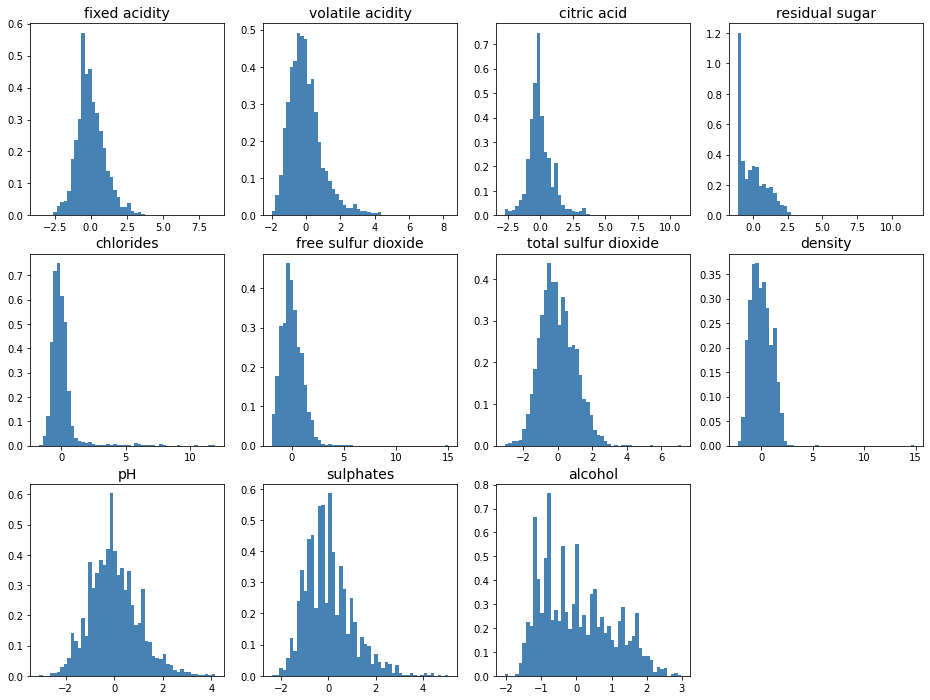

In [25]:
# On relance les graphiques 

fig = plt.figure(figsize=(16, 12))

for i in range(X_train_std.shape[1]):
    ax = fig.add_subplot(3,4, (i+1))
    h = ax.hist(X_train_std[:, i], bins=50, color = 'steelblue', density=True, edgecolor='none')
    ax.set_title(data.columns[i], fontsize=14)

## Validation croisée 

In [36]:
from sklearn import neighbors, metrics

# Fixe des valeurs d'hyperparamètres 
param_grid = {'n_neighbors':[3,5,7,9,11,13,15]}

# Choix du score à optimiser => proportion de prédictions correctes
score = 'accuracy'

# Classifieur kNN
clf = model_selection.GridSearchCV(
    neighbors.KNeighborsClassifier(),
    param_grid,
    cv = 5,
    scoring = score)

# Optimisation du classifieur sur le training set
clf.fit(X_train_std, y_train)

# Affichage du meilleur hyperparamètre 
print("Meilleur hyperparamètre :") 
print(clf.best_params_)

# Afficher les performances
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        clf.cv_results_['mean_test_score'], # score moyen
        clf.cv_results_['std_test_score'],  # écart-type du score
        clf.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )

Meilleur hyperparamètre :
{'n_neighbors': 13}
Résultats de la validation croisée :
accuracy = 0.761 (+/-0.018) for {'n_neighbors': 3}
accuracy = 0.762 (+/-0.029) for {'n_neighbors': 5}
accuracy = 0.763 (+/-0.022) for {'n_neighbors': 7}
accuracy = 0.765 (+/-0.027) for {'n_neighbors': 9}
accuracy = 0.761 (+/-0.014) for {'n_neighbors': 11}
accuracy = 0.766 (+/-0.019) for {'n_neighbors': 13}
accuracy = 0.763 (+/-0.023) for {'n_neighbors': 15}
